### Linear Model

In [43]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error


In [44]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


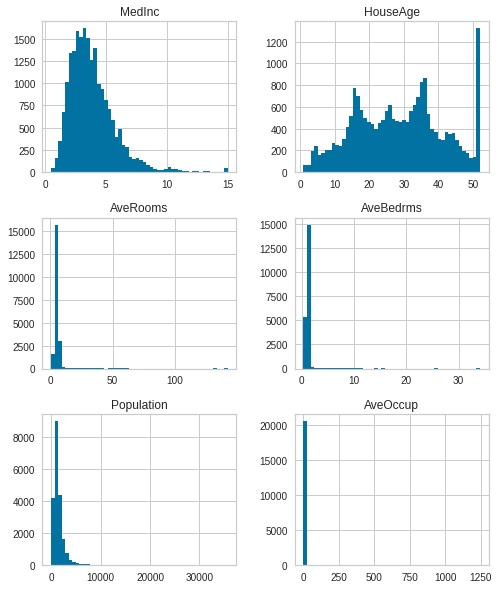

In [45]:
# Plot initial variable distributions:

X.hist(bins=50, figsize=(8, 10))
plt.show()

In [46]:
# To train and evaluate a model, let's first split the data into
# train and test data:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14448, 6), (6192, 6), (14448,), (6192,))

In [47]:


# Let's scale the features.
# This is a normal procedure for linear models.
# I will explain this later in the course.

scaler = StandardScaler()
scaler.fit(X_train)



StandardScaler()

In [48]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5987894249515694
Test set
Linear Regression mse: 0.652534450500461



### Residuals
* Residuals are the difference b/w observed value and the predicted value

In [49]:
# Calculate the residuals
error = y_test - pred

#### Residuals 
* Above the residual are centered at 0,show fairly normal distributio
*  Some Skew towards left,with few higher values towards right distribution


<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

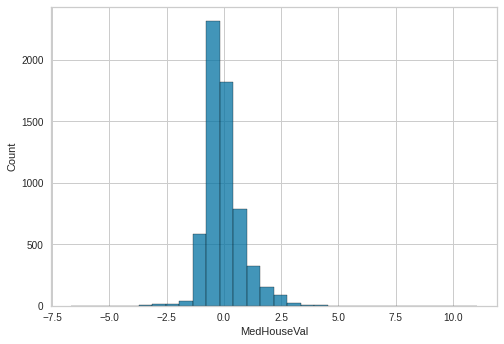

In [50]:
# Some Skew towards left,with few higher values towards right distribution
sns.histplot(error,bins=30)


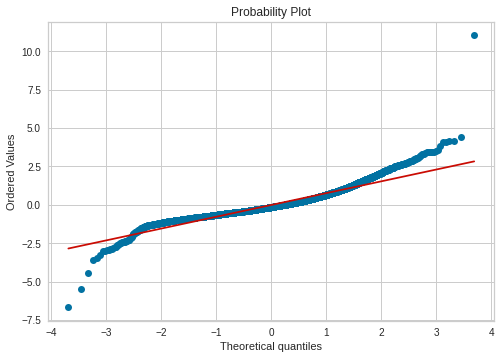

In [51]:
# We can also analyse the residuals distribution with 
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error,dist='norm',plot=plt)
plt.show()

### Homoscedasticity
* Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s)
* Also called homogeneity of variance,describes a relationship in which error term,are same across the value of independent variable
* If distribution of residuals is homogeneous across the variable values, then variable are homoscedastic


##### Other Test for Homoscedasticity
* Residuals plot
* Levene’s test
* Barlett’s test
* Goldfeld-Quandt Test


In [52]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

Text(0, 0.5, 'Residuals')

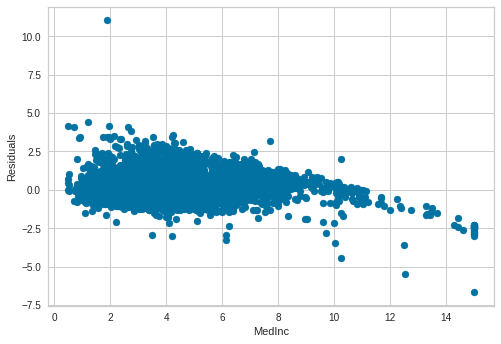

In [53]:
# plot residuals vs. one of the independent
plt.scatter(x=X_test['MedInc'],y=error)
plt.xlabel('MedInc')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

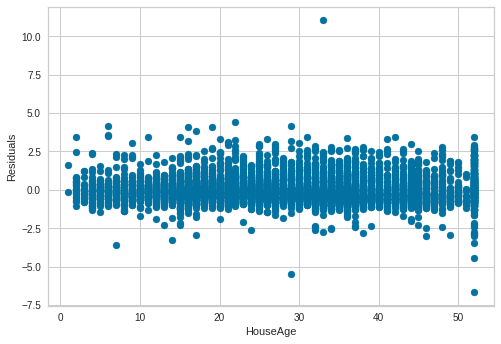

In [54]:
# Let's plot the residuals vs. HouseAge.

plt.scatter(x=X_test['HouseAge'], y=error)
plt.xlabel('HouseAge')
plt.ylabel('Residuals')

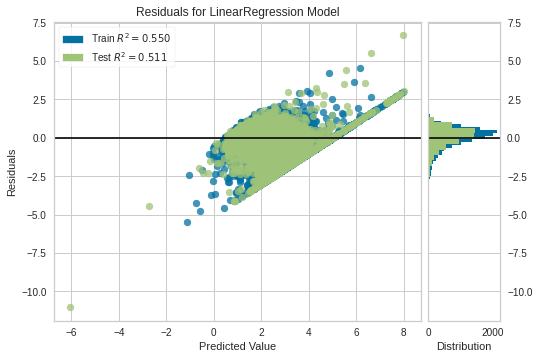

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [55]:
from yellowbrick.regressor.residuals import ResidualsPlot
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train),y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train),y_train)
visualizer.score(scaler.transform(X_test),y_test)
visualizer.poof()

#### Results
* Residuals vs Prediction,if residuals are homocedastic against prediction
* Residual are not centerd at 0, distribution are slightly skewed

#### Improving Model fit

In [56]:
# Apply the box-cox transfoPopulationation to the variables.

X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14448, 6), (6192, 6), (14448,), (6192,))

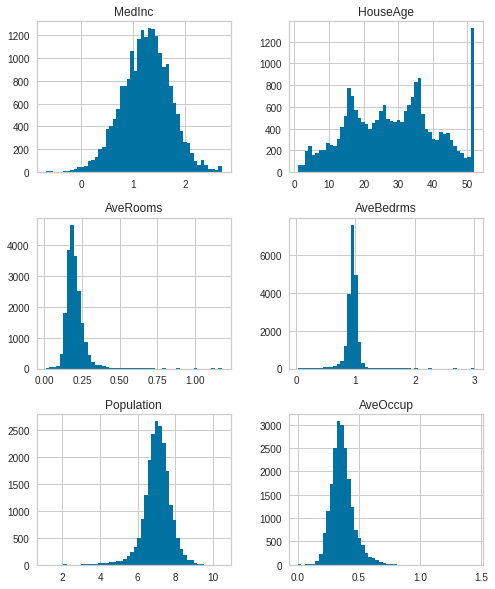

In [57]:
# (see that values are more evenly distributed)

X.hist(bins=50, figsize=(8,10))
plt.show()

In [58]:


# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)



StandardScaler()

In [59]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 0.5827343807084003
Test set
Linear Regression mse: 0.5885761677910881



In [60]:
# Calculate the residuals.

error = y_test - pred


<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

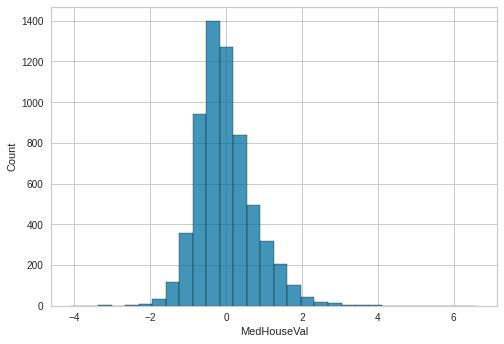

In [61]:
# We make a histogram to analyse the residuals'
# distribution.

sns.histplot(error, bins=30)

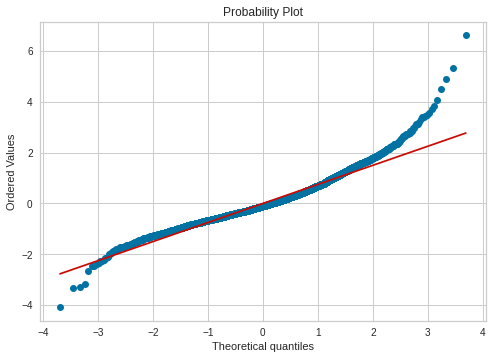

In [62]:
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()


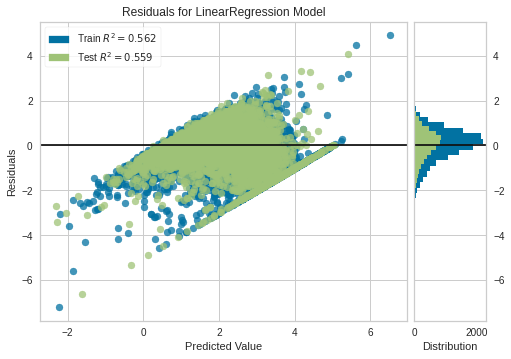

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()